MRIDUL BHATTARAI

1. Download the MNIST dataset using the torchvision library and create a subset
of the dataset containing 1,000 samples. Each sample will include a 28 ×28 pixel
image, along with a single integer value denoting the sample’s respective class (num-
ber).

In [21]:
#install all packages
!pip install numpy pandas matplotlib torch torchvision einops seaborn

Defaulting to user installation because normal site-packages is not writeable


Label of the image: 6


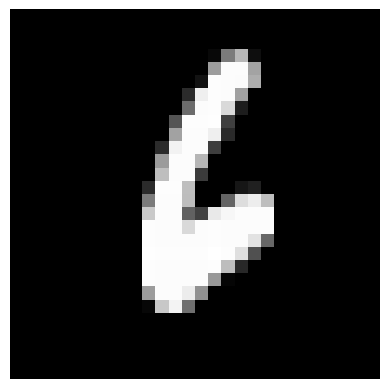

In [22]:
import torch
from torchvision import datasets, transforms
import numpy as np
import random
import matplotlib.pyplot as plt

transform = transforms.ToTensor()  # To convert images to tensor (multi-dimensional arrays)
# To download the MNIST dataset (Only downloaded train data at this time)
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# To Create a subset of 1000 samples
num_samples = 1000
images = mnist_data.data[:num_samples]  # First 1000 images
labels = mnist_data.targets[:num_samples] # First 1000 Samples

# To save our 1000 images and labels to file
np.save('mnist_img_subset.npy', images)
np.save('mnist_lbl_subset.npy', labels)

#To generate random integer (an integeger between 0 and 1000)
i = random.randint(0, 999)

#Print ith image and its label
print(f"Label of the image: {labels[i].item()}") 
image = images[i].squeeze()  
plt.imshow(image, cmap='grey')
plt.axis('off') 
plt.show()


2. Plot a histogram of classes in your subset of MNIST.

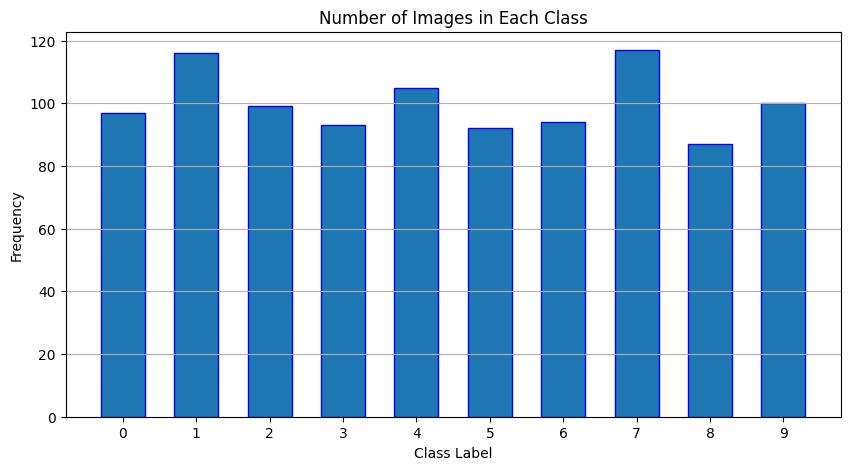

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(labels.numpy(), bins=np.arange(11)-0.5, edgecolor='blue', rwidth=0.6) #.numpy() converts tensor into Python array (Matplotlib does not work with Pytorch tensors directly)
plt.title('Number of Images in Each Class')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks(np.arange(10))  # Class labels 0-9 on the x-axis
plt.grid(axis='y')
plt.show()

3. Use the einops python package to ‘batch’ the subset of MNIST images. Each
batch should contain 25 different samples.
Hint: The subset of MNIST image data should change dimensions from [1000, 28,
28] →[Number of Batches, Batch Size, 1, 28, 28]
Context: Deep learning models operate over batches of samples. This rapidly
speeds up computation as the forward pass runs parallel across the batch dimension.
Batching also can improve optimization and provides the S in SGD (Stochastic
Gradient Descent). Additionally, neural networks expect a channel dimension for
image data. MNIST is grayscale so it only contains one channel, but other images
can contain color, in which case they will have three channels, RGB.
Once you have completed this, Congrats! You’ve built your own dataloader!

In [25]:
import einops
# To reshape the images into 40 batches of 25 images each
batch_size = 25

print("Original Shape:", images.shape)

num_batches = num_samples // batch_size #calculates as integer

# To use einops to rearrange the dimensions of images from (1000,28,28) to (40,25,1,28,28)
batched_images = einops.rearrange(images, '(b n) h w -> b n 1 h w', b=num_batches)

print("Batched images shape:", batched_images.shape)

Original Shape: torch.Size([1000, 28, 28])
Batched images shape: torch.Size([40, 25, 1, 28, 28])


4. Randomly select an MNIST image sample and, using matplotlib, plot it in three
dimensions. The x and y-axis’ should be the respective pixel locations, and the
z-axis should be the pixel intensity.

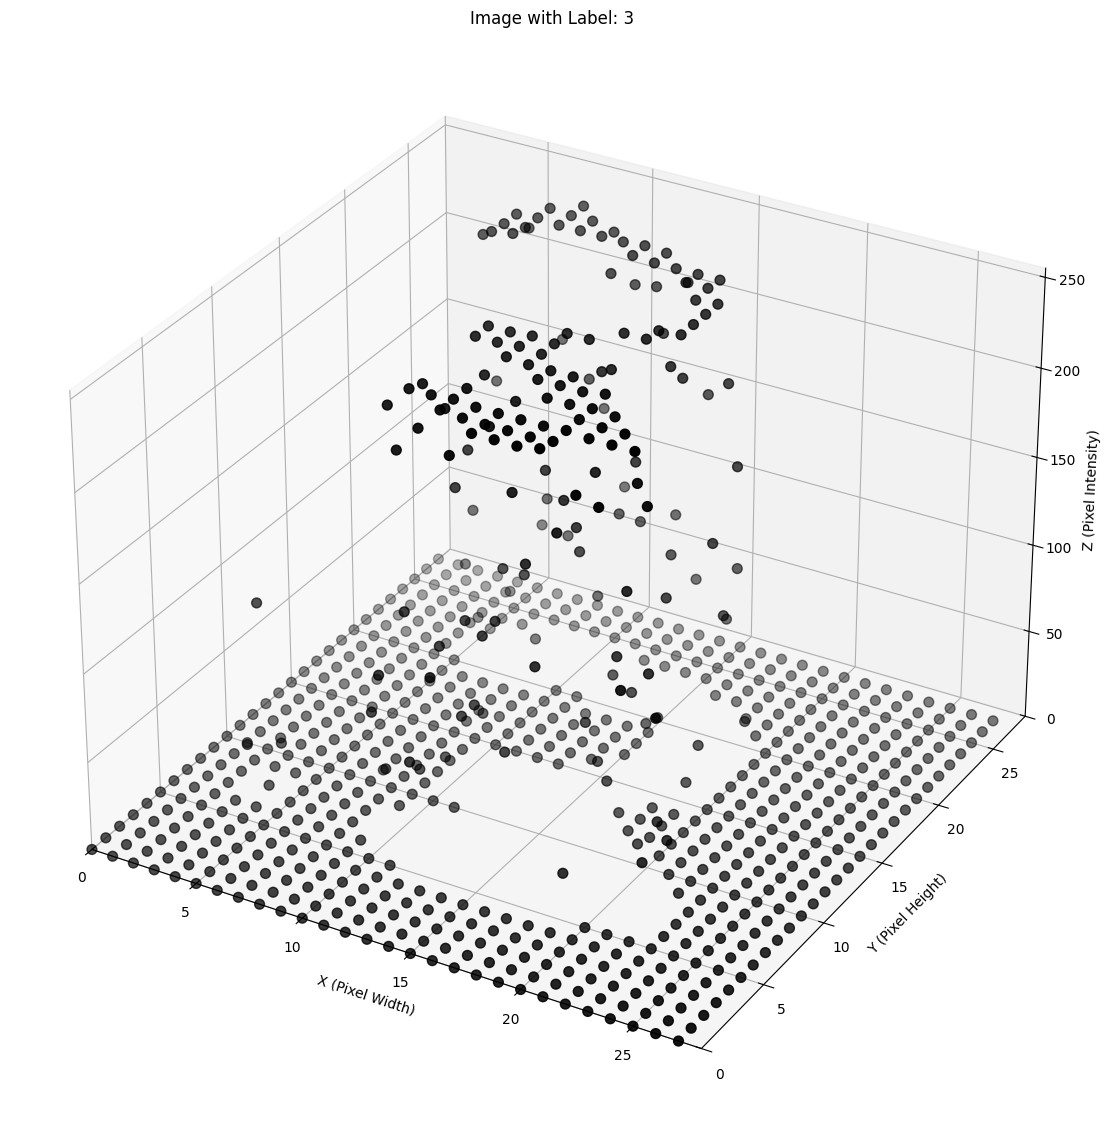

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# To randomly select an image from the dataset of 1000 images
j = random.randint(0, 999) #Generate a random integerandom_r
random_image=images[j]
random_label=labels[j]


# To generate x and y indices which gives the pixel location of each image
x = np.tile(np.arange(random_image.shape[1]), random_image.shape[0])  # Gives X-coordinate of each pixel
y = np.repeat(np.arange(random_image.shape[0]), random_image.shape[1])  # Gives Y-coordinate of each pixel

# Flatten the image to get pixel intensities
z = random_image.flatten()

# To create a 3D scatter plot
fig = plt.figure(figsize=(14, 15)) #Specifies the dimension (Height and Weidth) of Figure (Graph in our case)
ax = fig.add_subplot(111, projection='3d')

# To scatter plot with all points in black (c='k' for black color)
ax.scatter(x, y, z, c='k', marker='o', s=50)  

# To set the labels for the axes
ax.set_xlabel('X (Pixel Width)')
ax.set_ylabel('Y (Pixel Height)')
ax.set_zlabel('Z (Pixel Intensity)')

# Set the title with the label of the image
ax.set_title(f'Image with Label: {random_label}')

# Set axis limits to improve the plot's readability
ax.set_xlim([0, random_image.shape[1]])
ax.set_ylim([0, random_image.shape[0]])
ax.set_zlim([0, 255])



# Show the plot
plt.show()

2.2 Load the data (energydata complete.csv) and perform the following analysis.

1. Plot the appliances energy consumption for whole period and a closer look at any
one week of consumption.

DOWNLOADED THE energy_complete.csv FILE TO THE SAME DIRECTORY AS OUR NOTEBOOK FILE.

In [26]:
import pandas as pd
# To load the dataset into the pandas dataframe
data = pd.read_csv('energydata_complete.csv')

# To display the first few rows (by default: 5 rows) of the dataset to get an overview
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


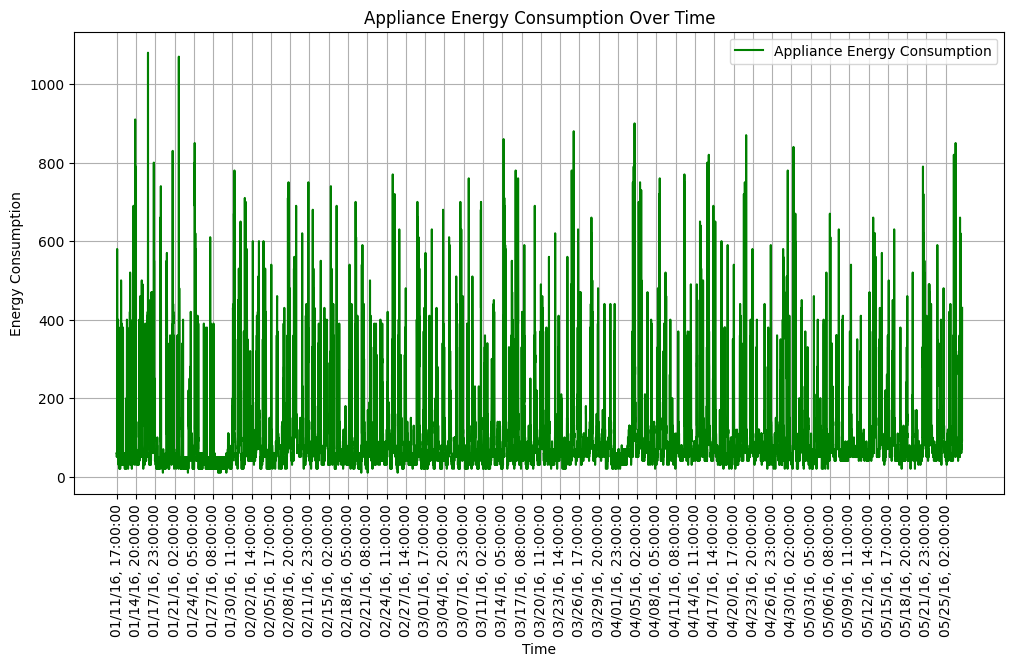

In [27]:
'''To plot the appliances energy consumption for the whole period'''

# To Convert the 'date' column from string to pandas datetime format
data['formatted_date'] = pd.to_datetime(data['date'])

# To plot the total appliance energy consumption for the entire period
plt.figure(figsize=(12, 6))#Specifies the figure dimension
plt.plot(data['formatted_date'], data['Appliances'], label='Appliance Energy Consumption', color='green')#plotting appliance energy consunption against Tiemdate 
plt.title('Appliance Energy Consumption Over Time')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%D, %H:%M:%S'))#Sets the format of the x-axis labels to display the date in the format "MM/DD/YY, HH:MM:SS"

#Labels
plt.xlabel('Time')
plt.ylabel('Energy Consumption')

#Making the ticks at X-axis wider for better readability
#The x-axis value starts at the minimum of date and ends at maximun
#There's 75 hours difference between two consecutive ticks
plt.xticks(pd.date_range(start=data['formatted_date'].min(), end=data['formatted_date'].max(), freq='75 h'))

plt.grid(True)
plt.xticks(rotation=90) #keeps the x-axis ticks labels vertical for better readability
plt.legend()
plt.show()

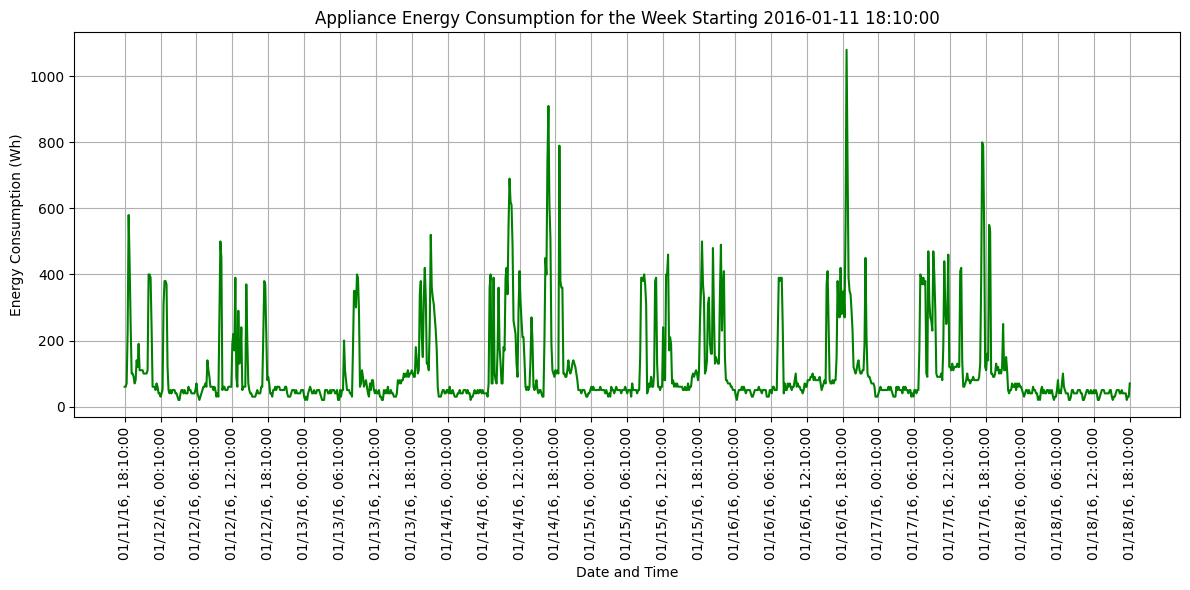

In [28]:
'''To plot energy consumption rate at any one random week of consumption'''

# To generate a random starting point for the week
random_start_datetime = random.choice(data['formatted_date'].unique())  # Random starting timestamp

# To filter data for exactly 7 days (7 * 24 hours) starting from the random start date & time
end_datetime = random_start_datetime + pd.Timedelta(hours=7*24) #end timestamp= start timestamp+7*24 hours
week_data = data[(data['formatted_date'] >= random_start_datetime) & (data['formatted_date'] <= end_datetime)] #week_data stores the values that are from start_datetime to end_datetime

# To plot the energy consumption for the selected week (7 * 24 hours window)
plt.figure(figsize=(12, 6))
plt.plot(week_data['formatted_date'], week_data['Appliances'], label="Energy Consumption (Week)", color='green')

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%D, %H:%M:%S'))

# Setting x-ticks at every 6 hours from start of the week to its end
plt.xticks(pd.date_range(start=random_start_datetime, end=end_datetime, freq='6h')) #Chosen freq=6 hours for better readability

# Set labels and title
plt.title(f'Appliance Energy Consumption for the Week Starting {random_start_datetime}')
plt.xlabel('Date and Time')
plt.ylabel('Energy Consumption (Wh)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
# Show the plot
plt.show()

2. Plot heatmap of hourly consumption of appliances for a week. An example heatmap
looks like Figure 1.

/var/folders/cc/245g4_494x10tvfjytk0hnv80000gn/T/ipykernel_4428/4127216489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data_['hour'] = week_data_['formatted_date'].dt.hour #Extracts the hour part of date
/var/folders/cc/245g4_494x10tvfjytk0hnv80000gn/T/ipykernel_4428/4127216489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data_['day'] = week_data_['formatted_date'].dt.dayofweek  # Monday=0, Sunday=6


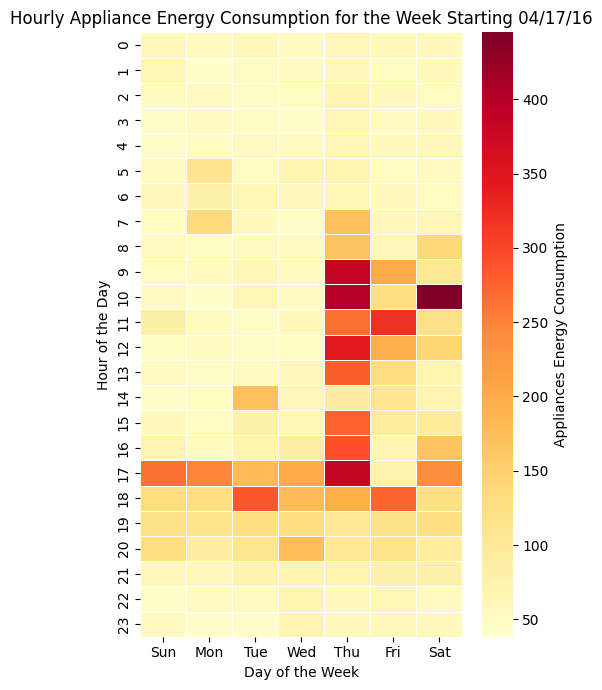

In [29]:
import seaborn as sns

# To generate a random starting point for the week
rndm_start_date = random.choice(data['formatted_date'].unique())  # Random starting timestamp

# To filter data for exactly 7 days starting from the random start date
end_datetime_ = rndm_start_date + pd.Timedelta(days=7) #end date is 7 days from the start ooint
week_data_ = data[(data['formatted_date'] >= rndm_start_date) & (data['formatted_date'] <= end_datetime_)]  # Fixed column name

# To extract day and hour from the 'formatted_date' column
week_data_['hour'] = week_data_['formatted_date'].dt.hour #Extracts the hour part of date
week_data_['day'] = week_data_['formatted_date'].dt.dayofweek  # Monday=0, Sunday=6

# To group data by day and hour, and calculate the average energy consumption per group
# mean() calculates the average of consumption for that hour and on that day 
heatmap_data = week_data_.groupby(['hour', 'day'])['Appliances'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(5, 7))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='.1f', cbar_kws={'label': 'Appliances Energy Consumption'}, linewidths=0.5)#generates a heatmap, applies the 'YlGnBu' color map, annotates the cells with formatted values (one decimal place), adds a color bar with the label 'Appliances Energy Consumption', and sets the line width between cells to 0.5

# Set labels and title
plt.title(f'Hourly Appliance Energy Consumption for the Week Starting {rndm_start_date.strftime("%D")}')
plt.ylabel('Hour of the Day')
plt.xlabel('Day of the Week')

# Get the starting day of the week
start_day = rndm_start_date.weekday()  # Monday=0, Sunday=6 (weekday() is a built-in function for Python's datetime objects)

# Create a list of day labels starting from the 'start_day'
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
actual_order= days_of_week[start_day:] + days_of_week[:start_day]
'''Since we do not always get our first day as monday, the display order is no longer Mon, Tue, .....Sat.
So, the sequence of days is stored in 'actual_order'. The first part on the RHS stores the days from starting day
to Sunday, this part is added to the latter part, which stores the days from Monday to the start day. This 
is how we can store seven days in the sequence they will occur.'''


# Adjust x-ticks to show the correct days of the week starting from the random start date
plt.xticks(ticks=np.arange(7) + 0.5, labels=actual_order, rotation=0) #adding 0.5 shifts tick labels to the center

# Show the plot
plt.tight_layout()
plt.show()

3. Plot the histogram of energy consumption of appliances.

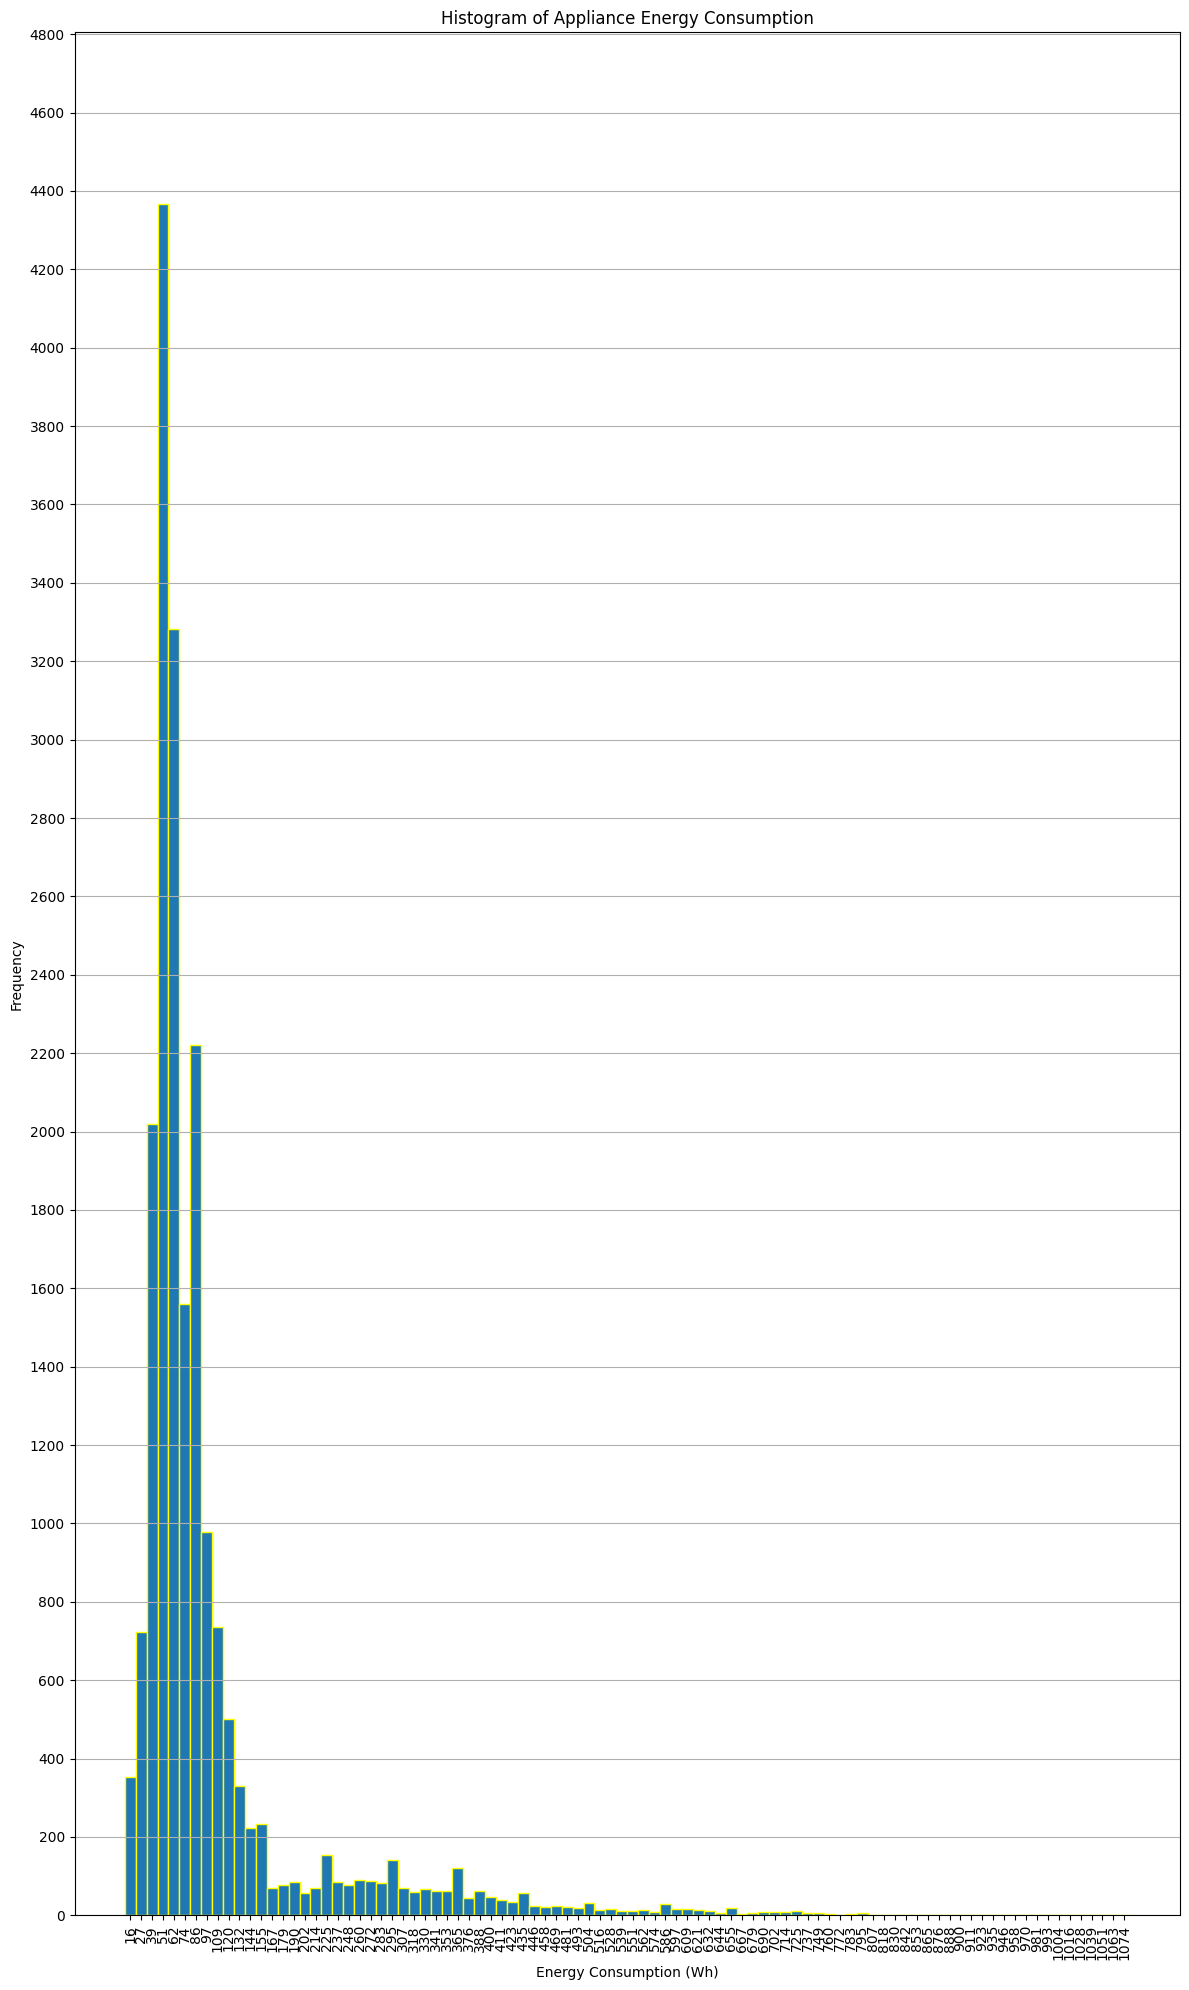

In [30]:
import matplotlib.pyplot as plt

# Set the number of bins to the number of unique values in 'Appliances' column
num_bins = len(data['Appliances'].unique())

# Plot the histogram with the defined number of bins
plt.figure(figsize=(12, 20))
n, bins, patches = plt.hist(data['Appliances'], bins=num_bins, edgecolor='yellow')

# Increase the height of bars by scaling up the frequencies (e.g., 200%)
for patch in patches:
    patch.set_height(patch.get_height())  # Scale up the height by 200%

# Title and labels
plt.title('Histogram of Appliance Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')

# Adjust the x-ticks to be centered on the bins
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers, rotation=90)


plt.locator_params(axis='y', nbins=40) 

# Adjust y-axis to ensure all bars fit by extending the limits
plt.ylim(0, max(n)*1.1)  # Extend the y-axis by 10% to make sure tall bars fit
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy
consumption vs. NSM.


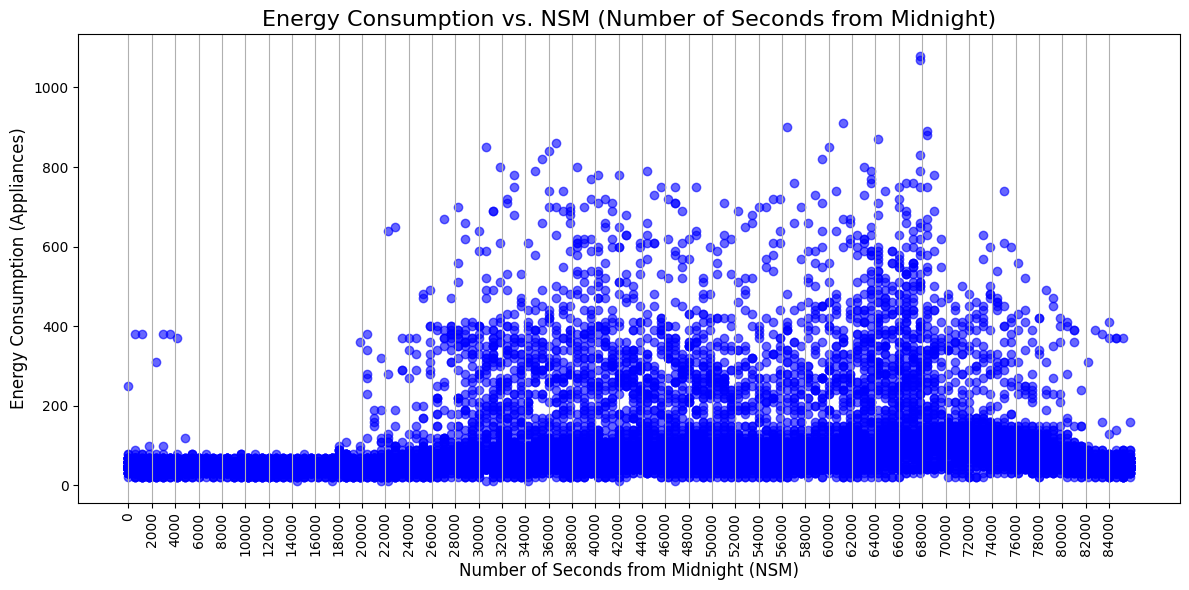

In [31]:
# To create variable NSM (Number of Seconds from Midnight)
data['NSM'] = (data['formatted_date'].dt.hour * 3600) + \
              (data['formatted_date'].dt.minute * 60) + \
              data['formatted_date'].dt.second

# Plotting Energy Consumption vs NSM
plt.figure(figsize=(12, 6))

plt.scatter(data['NSM'], data['Appliances'], color='blue', alpha=0.6)

# Title and labels
plt.title('Energy Consumption vs. NSM (Number of Seconds from Midnight)', fontsize=16)
plt.xlabel('Number of Seconds from Midnight (NSM)', fontsize=12)
plt.ylabel('Energy Consumption (Appliances)', fontsize=12)

#Formatting x-ticks
min_nsm = data['NSM'].min()
max_nsm = data['NSM'].max()
tick_positions = range(min_nsm, max_nsm, 2000)  # Creates ticks from min to max NSM with step 2000
plt.xticks(tick_positions, rotation=90)  # Sets ticks with rotation for better readability

# Show the plot
plt.tight_layout()
plt.grid(axis='x')
plt.show()

5. Plot appliances energy consumption vs. Press mm Hg

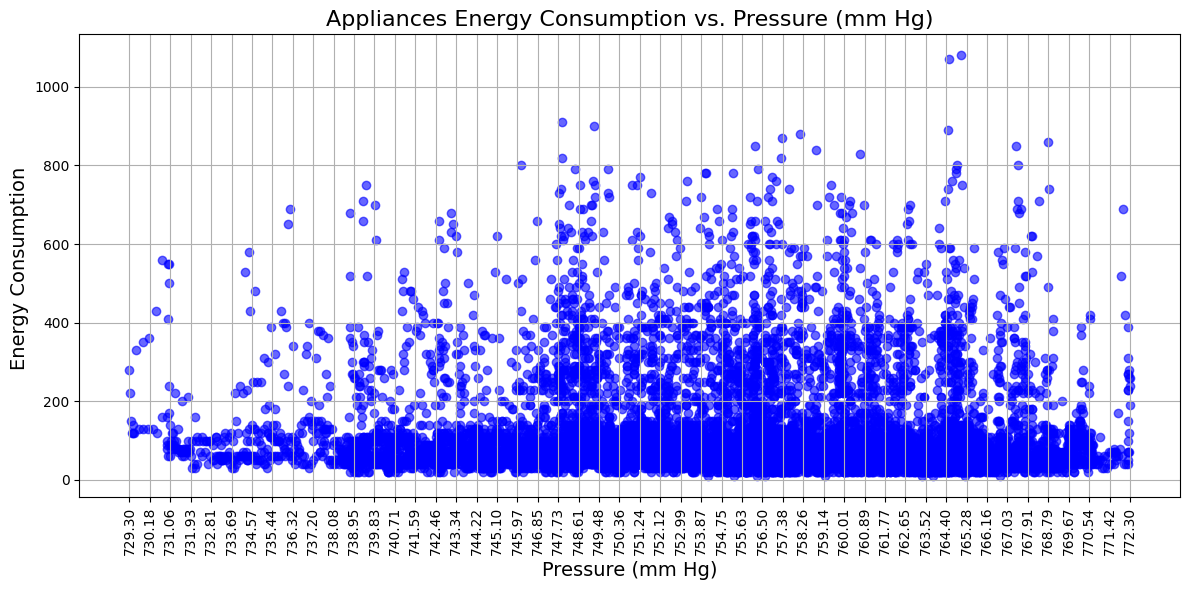

In [32]:
# Assuming data has 'Appliances' and 'Pressure_mmHg' columns
# Replace 'Pressure_mmHg' with the actual column name in your dataset if it's different.

plt.figure(figsize=(12, 6))

# Plot the appliances energy consumption vs. pressure in mm Hg
plt.scatter(data['Press_mm_hg'], data['Appliances'], color='blue', alpha=0.6)

# Adding titles and labels
plt.title('Appliances Energy Consumption vs. Pressure (mm Hg)', fontsize=16)
plt.xlabel('Pressure (mm Hg)', fontsize=14)
plt.ylabel('Energy Consumption ', fontsize=14)

tick_pos = np.linspace(data['Press_mm_hg'].min(), data['Press_mm_hg'].max(), 50)
plt.xticks(tick_pos, rotation=90)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

6. It is observed that the major contributing factors for the energy consumption
among all other features is NSM and Press mm Hg. Comment on it.

**NSM shows a moderate positive correlation, as observed in the Energy Consumption (Appliances) vs. NSM plot. The consumption is higher between 26,000 to 80,000 seconds from midnight (which corresponds to 7:15 AM to 10:13 PM). This indicates that there is some correlation between NSM and energy consumption.** 
**On the other hand, in the Appliances Energy Consumption vs. Pressure (mm Hg) plot, energy consumption varies widely at almost every pressure level, with both low and high values appearing throughout. This suggests that energy consumption does not strongly depend on pressure. If there is any correlation, it is likely very weak.** 

**Now, let's mathematically calculate how the energy consumption of appliances is related to other parameters.**

In [36]:
# To convert the 'date' column from string to pandas datetime format
data['formatted_date'] = pd.to_datetime(data['date'])

# Exclude non-numeric columns and select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

#To calculate the correlation matrix for the numeric columns only
correlation_matrix = numeric_data.corr()

# Get correlation with 'Appliances'
correlation_with_appliances = correlation_matrix['Appliances'].sort_values(ascending=False)

# Print the correlation results
print(correlation_with_appliances)

Appliances     1.000000
NSM            0.217152
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


**The correlation values indicate that NSM (0.217) and lights (0.197) have the strongest positive relationships with appliance energy consumption, suggesting that energy usage tends to be higher at certain times of the day and when lights are in use. Other temperature-related variables (T2, T6, T_out) show weak positive correlations, while pressure (-0.0349) and various relative humidity (RH) values exhibit weak negative correlations, with RH_out (-0.152) having the strongest inverse relationship. Overall, most correlations are weak, implying that no single factor strongly determines appliance energy consumption.**

2.3. Multi-variate

In [37]:
# Load the dataset (space-delimited)
airfoil_data = pd.read_csv('airfoil_self_noise.dat', delimiter=r'\s+')  # delimiter as multiple spaces

# Adding column names based on the dataset description
airfoil_data.columns = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 
                        'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level']

# Checkig the first few rows to understand the structure
print("Data Preview:")
print(airfoil_data.head())

numeric_columns = airfoil_data.select_dtypes(include=[np.number])#only takes numeric values
# 1. Mean
mean_values = np.mean(numeric_columns, axis=0)

# 2. Variance
variance_values = np.var(numeric_columns, axis=0)

# 3. Median
median_values = np.median(numeric_columns, axis=0)

# 4. Kurtosis
kurtosis_values = numeric_columns.apply(lambda x: np.mean((x - np.mean(x))**4) / (np.var(x)**2) - 3)

# 5. Skewness
skewness_values = numeric_columns.apply(lambda x: np.mean((x - np.mean(x))**3) / (np.var(x)**1.5))

# 6. Range
range_values = np.ptp(numeric_columns, axis=0)  # ptp is peak-to-peak (max - min)

# Combine all statistics in a single row
stats = pd.DataFrame({
    'Mean': mean_values,
    'Variance': variance_values,
    'Median': median_values,
    'Kurtosis': kurtosis_values,
    'Skewness': skewness_values,
    'Range': range_values
})

# Transposing the DataFrame to show each statistic in a row
stats_df = stats.T

# Print out
print("\nDescriptive Statistics")
print(stats_df)

Data Preview:
   Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
0       1000              0.0        0.3048                  71.3   
1       1250              0.0        0.3048                  71.3   
2       1600              0.0        0.3048                  71.3   
3       2000              0.0        0.3048                  71.3   
4       2500              0.0        0.3048                  71.3   

   Suction_side_displacement_thickness  Scaled_sound_pressure_level  
0                             0.002663                      125.201  
1                             0.002663                      125.951  
2                             0.002663                      127.591  
3                             0.002663                      127.461  
4                             0.002663                      125.571  

Descriptive Statistics
             Frequency  Angle_of_attack  Chord_length  Free_stream_velocity  \
Mean      2.887770e+03         6.786818      0.1